In [1]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import seaborn as sns
import numpy as np
import pandas as pd
import time
from plotly.subplots import make_subplots
import plotly.graph_objects as go

Task 1: Interactive Line Plot with Zoom and Pan

Create an interactive line plot using matplotlib widgets.
Allow users to zoom in and out or pan across the plot.

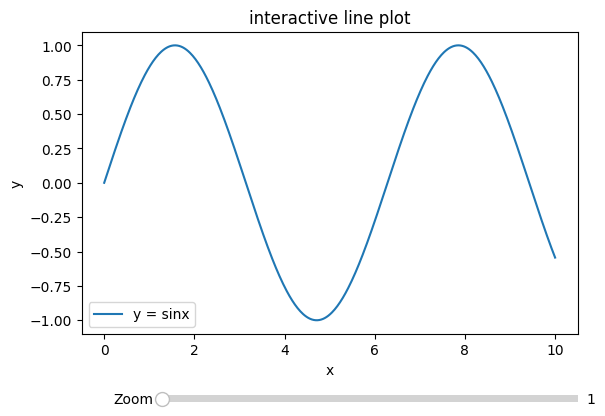

In [2]:
x = np.linspace(0,10,500)
y = np.sin(x)

fig, axs = plt.subplots()
plt.subplots_adjust(bottom=0.25)
line, = axs.plot(x,y, label='y = sinx')
axs.set_title("interactive line plot")
axs.set_xlabel('x')
axs.set_ylabel('y')
axs.legend()

axs_zoom = plt.axes([0.25, 0.1, 0.65, 0.03])
zoom_slider = Slider(axs_zoom, "Zoom", 1, 10, valinit=1)

def update(val):
    pos = zoom_slider.val
    axs.set_xlim(0, 10 /pos)
    fig.canvas.draw_idle()

zoom_slider.on_changed(update)
plt.show()

Task 2: Seaborn Custom Theme

Create a custom theme using seaborn.set_style() and seaborn.set_palette().
Use the theme to plot a violin plot and a pair plot on a random dataset.

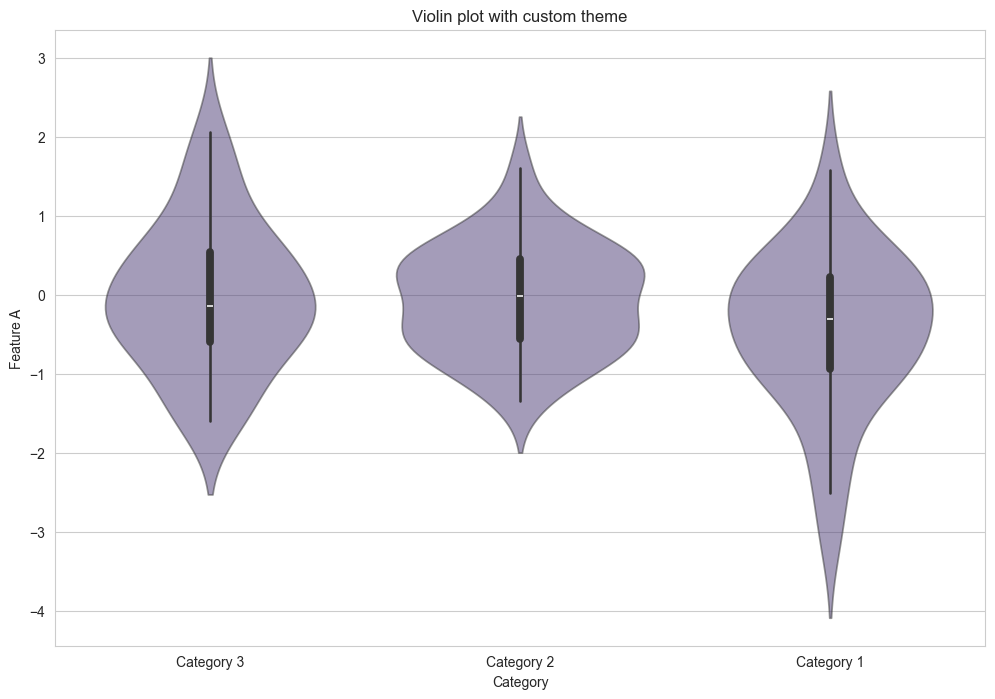

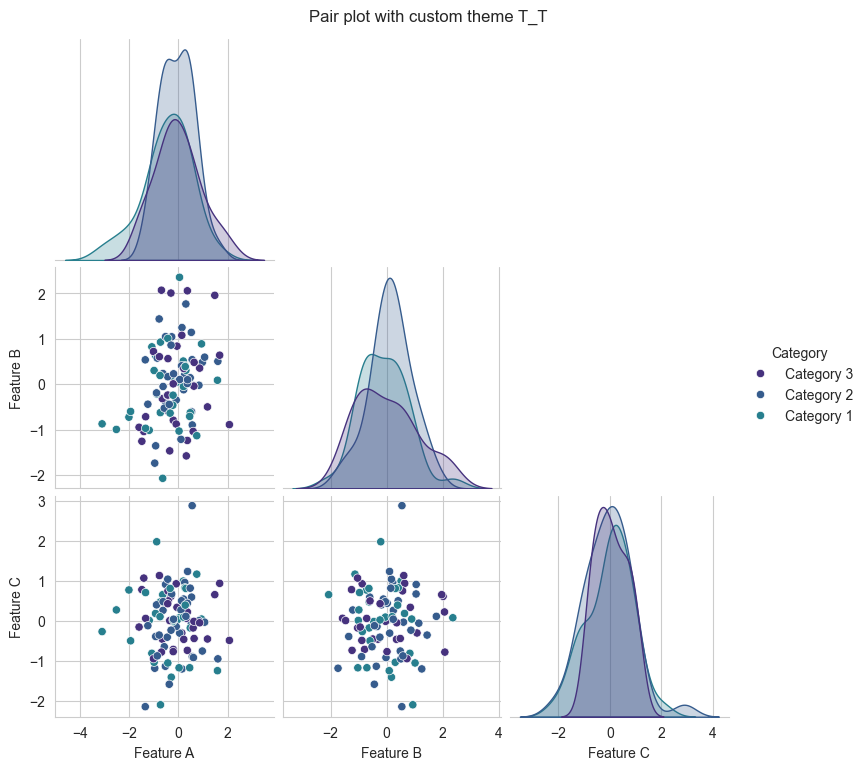

In [3]:
sns.set_style("whitegrid")
#sns.set_palette("pastel")
sns.set_palette("viridis")

data = pd.DataFrame(np.random.randn(100,3), columns=['Feature A', 'Feature B', 'Feature C'])
data['Category'] = np.random.choice(['Category 1', 'Category 2','Category 3'], 100)

plt.figure(figsize=(12,8))
sns.violinplot(x='Category', y='Feature A', data = data, alpha =0.5)
plt.title("Violin plot with custom theme")
plt.show()

sns.pairplot(data, hue ='Category', corner= True)
plt.suptitle('Pair plot with custom theme T_T', y=1.02)
plt.show()

Task 3: Dynamic Data Update (Real-Time Simulation)

Simulate a real-time plot of sensor data (e.g., temperature values).
Update the plot every second for 20 seconds.

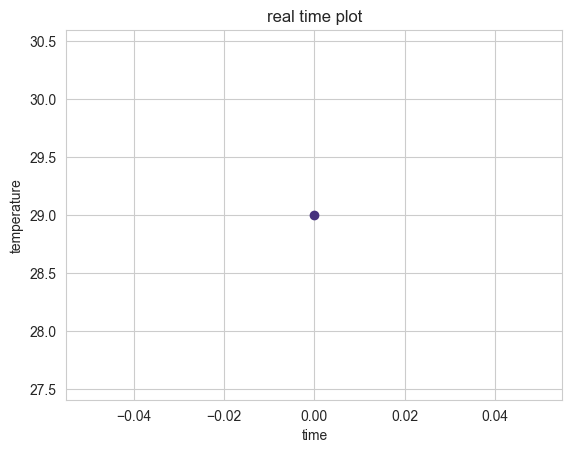

In [4]:
plt.ion()
fig, ax = plt.subplots()
ax.set_title("real time plot")
ax.set_xlabel('time')
ax.set_ylabel('temperature')
line, = ax.plot([], [], marker = 'o')

x_data, y_data = [], []

for t in range(20):
    x_data.append(t)
    y_data.append(np.random.randint(20,30))
    line.set_data(x_data, y_data)
    ax.relim()
    ax.autoscale_view()
    plt.pause(1)

#plt.ioff()
#plt.show()

Task 4: Interactive Heatmap with Plotly

Generate a correlation heatmap for a random dataset using Plotly.
Add interactive tooltips to display exact values.

In [6]:
from sklearn.datasets import load_wine
import pandas as pd
import plotly.graph_objects as go

# Load the wine dataset
wine_data = load_wine()
data = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create interactive heatmap
fig = go.Figure(
    data=go.Heatmap(
        z=correlation_matrix.values,
        x=correlation_matrix.columns,
        y=correlation_matrix.columns,
        colorscale='Viridis',
        hoverongaps=False
    )
)
fig.update_layout(
    title="Interactive Correlation Heatmap (Wine Dataset)",
    xaxis_title="Features",
    yaxis_title="Features"
)
fig.show()


Task 5: Combining Multiple Customizations

Create a dashboard-style plot with:
A bar chart,
A scatter plot,
A line plot,
A heatmap.
Combine these into one figure with a custom grid layout.

In [11]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Load the wine dataset
wine_data = load_wine()
data = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

# Create subplots for the dashboard
fig = make_subplots(
    rows=2, cols=2, 
    subplot_titles=("Bar Chart", "Scatter Plot", "Line Plot", "Heatmap"),
    vertical_spacing=0.2
)

# Bar Chart: Mean values of features
mean_values = data.mean().sort_values(ascending=False)
fig.add_trace(
    go.Bar(x=mean_values.index[:5], y=mean_values.values[:5], name="Top 5 Feature Means"),
    row=1, col=1
)

# Scatter Plot: Comparing two features
fig.add_trace(
    go.Scatter(
        x=data["alcohol"], 
        y=data["malic_acid"], 
        mode='markers', 
        marker=dict(color='blue', size=7),
        name="Alcohol vs Malic Acid"
    ),
    row=1, col=2
)

# Line Plot: Feature trend (first 20 rows for simplicity)
fig.add_trace(
    go.Scatter(
        x=np.arange(20), 
        y=data.iloc[:20]["ash"], 
        mode='lines+markers', 
        name="Ash Trend",
        line=dict(color='green')
    ),
    row=2, col=1
)

# Heatmap: Correlation matrix
correlation_matrix = data.corr()
fig.add_trace(
    go.Heatmap(
        z=correlation_matrix.values,
        x=correlation_matrix.columns,
        y=correlation_matrix.columns,
        colorscale='Viridis',
        name="Correlation Heatmap"
    ),
    row=2, col=2
)

# Update layout
fig.update_layout(
    title="Dashboard-Style Plot (Wine Dataset)",
    height=1000,
    showlegend=False
)

fig.show()
